## Statistical analysis and ML prediction of player value

In [81]:
import chardet
import numpy as np
import pandas as pd

# Check the encoding of the data
with open('2021-2022_Football_Player_Stats.csv', 'rb') as file:
    print(chardet.detect(file.read()))

# Read the data
data = pd.read_csv('2021-2022_Football_Player_Stats.csv', sep=';', encoding='Windows-1252')
pd.set_option('display.max_columns', None)

{'encoding': 'Windows-1252', 'confidence': 0.7299554652788953, 'language': ''}


#### Data specification

In [82]:
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.0,0.0,0.0,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.1,17.0,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.0,0.0,0.0,26.5,9.59,8.94,4.91,29.0,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.0,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.0,58.0,5.06,23.3,23.8,15.0,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.4,25.0,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.0,0.0,0.0,35.3,3.78,7.95,31.70,12.1,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.0,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.0,57.3,8.28,32.8,25.7,2.9,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.8,27.2,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.0,0.0,0.0,52.6,4.71,3.72,4.82,53.1,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.0,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.0,70.4,2.01,22.7,41.8,10.9,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.0,0.0,0.0,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.3,19.6,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.0,0.0,0.0,37.6,5.64,6.65,4.48,43.9,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.0,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.0,61.6,0.67,13.7,40.3,11.6,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09,0.85,1.46,46.3,43.0,93.0,1.86,0.27,0.00,0.00,1.40,2.07,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,0.5

The data was downloaded from kaggle, https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats,
and collected from https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats. 
It consists of statistics from all the football players in the five biggest leagues, Premier League, La Liga, Seria A, Bundesliga and Ligue 1, from the season 2022-2023. 
It constains more than 2200 players with 143 columns. 
The columns ranges from metadata about the players, to more specific statistics about the players performance in the matches they have played in. 
The data types in the columns include, nominal data, such as what club and what position they play at, numerical data, such as how many matches they've played, and continuous data, such as their goal per game ratio or pass completion rate.
The input data, x-values, in the analysis will be a subset of all the columns present in the dataset. 
This subset will consists of parameters that I see fit and are most relevant for the analysis to achieve a good result. 
There will be a careful consideration of what parameter are relevant and not.

The target value, is a score for each player representing their market value. A players market value is an intrinsically subjective value. There is no de-facto value of a player, only estimates, until the player is bought by another club; and the purchase of a player is not an independent price and doesn't have to fully represent the player's market value, it could be subject to several different factors leading to the price being higher or lower than what it could've been. 

#### Validation data - the 20 most valuable players currently
Source: https://www.footballtransfers.com/en/values/players/most-valuable-players,
according to their 'Transfer fee prediction' model.

In [83]:
# Player: (ranking (1-20), market value (in euros))
most_valuable_players = {
    'Kylian Mbappe': (1, 147_300_000), 
    'Erling Haaland': (2, 143_600_000),
    'Vinicius Junior': (3, 129_100_000),
    'Phil Foden': (4, 129_100_000),
    'Trent Alexander-Arnold': (5, 97_500_000),
    'Jamal Musiala': (6, 95_300_000),
    'Harry Kane': (7, 89_400_000),
    'Jude Bellingham': (8, 88_000_000),
    'Lautaro Martinez': (9, 84_000_000),
    'Ederson': (10, 81_100_000),
    'Bruno Fernandes': (11, 80_500_000),
    'Bernardo Silva': (12, 79_600_000),
    'Rodri': (13, 74_900_000),
    'Fabinho': (14, 74_400_000),
    'Kai Havertz': (15, 73_900_000),
    'Antony': (16, 73_300_000),
    'Andrew Robertsson': (17, 73_200_000),
    'Alphonso Davies': (18, 72_300_000),
    'Mason Mount': (19, 72_000_000),
    'Matthijs de Ligt': (20, 71_500_000),
}

#### Training and validation data split

The two sets are from two distinct sources, since there is no classification label present in the downloaded data. The training data will be all the data from the csv-file and the validation data will be a collection of different predictions of player market value from trusted sources. The results from the training data will then be compared to the chosen validation data to evaluate the results.

We will start with an initial analysis, showing the relation between the training data and the validation data, with only three parameters. The choice of what three parameters to use have a huge impact on the result and is a great simplification, perhaps to big, to yeild reasonable results. However, there is also value in showing that the task of predicting the market value of a player is complicated and involves a lot of parameter consideration, in both what parameters to choose, but also the weight of the parameters, i.e. what parameters are more important in yeilding a good result.

In [88]:

# Finding null values
print(data.columns[data.isnull().any()].tolist())
print(data.isnull().sum().sum())

['Nation', 'Age']
2


In [85]:
# Seeing if there is any odd combinations of positions
data['Pos'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

#### Q-Q plot of the relation between the training data and the validation data  
Using 3 parameters from the training data  
**Parameters of choice**
* Goals Scored
* Age
* 

#### Problem statement  
The goal of this project is to create two models that predict, from the given data, a football players market value. The result will be compared to established market value predictors and the comparison will act as an evaluation of how good the models are. Futhermore, there will be a careful statistical analysis of the data, in general and more specifically how it's used in the models, what parameters are of interest and how that can and will impact the results.  

The market value of players are of intereset for several reasons.
Mainly to put a label on a given player, the worth of a player, in an economical sense. 
Football is a sport as well as a business. 
In order to compete a club must develop and aquire new players. 
Statistical analysis have been a huge part of sports for many years now and carefully developed models can give a club a big edge over others, by for instance, finding and aquireing players below their *actual* market value.

#### Descriptive analysis

##### Successfully completed dribbles 
Displayed as a histogram for total successfully completed dribbles and as a percentage, given the total attempted.

Text(0.5, 1.0, 'Percentage of dribbles completed successfully')

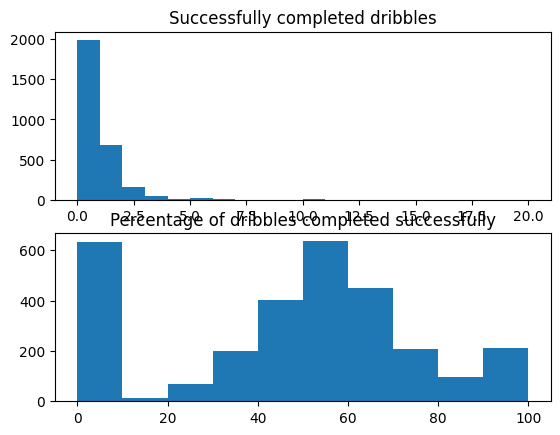

In [91]:
from matplotlib import pyplot as plt

driSucc = data['DriSucc']
driSuccPer = data['DriSucc%']

fig, axes = plt.subplots(2)
axes[0].hist(driSucc, bins=20)
axes[0].set_title('Successfully completed dribbles')
axes[1].hist(driSuccPer)
axes[1].set_title('Percentage of dribbles completed successfully')

In [92]:
data.sort_values(by='DriSucc', ascending=False)[['Player', 'DriSucc', 'Pos']][0:20]

,Player,DriSucc,Pos
2842,Neco Williams,20.00,DF
63,Mircea Alexandru Tirlea,10.00,DF
2007,Tomáš Ostrák,10.00,FWMF
1972,Brain Oddei,10.00,FW
1501,Félix Lemaréchal,10.00,MF
2668,Takehiro Tomiyasu,10.00,DF
319,Nathan Bitu Mazala,10.00,DF
2540,Matìas Soulé,10.00,FW
1576,Luismi,10.00,FW
1085,Yanis Guermouche,10.00,MFFW


In [93]:
data.sort_values(by='DriSucc%', ascending=False)[['Player', 'DriSucc%', 'Pos']][0:20]

,Player,DriSucc%,Pos
173,Cédric Bakambu,100.0,FW
565,Lucas Copado,100.0,FW
193,Mattia Bani,100.0,DF
1046,Robin Gosens,100.0,DF
564,Liam Cooper,100.0,DF
197,Barbero,100.0,MFFW
2477,Francisco Sierralta,100.0,DF
1972,Brain Oddei,100.0,FW
1967,Adam Obert,100.0,DF
1729,James Mcatee,100.0,MFFW


In [95]:
data.sort_values(by='MP', ascending=False)[['Player', 'MP', 'Pos']][0:20]

,Player,MP,Pos
320,Marco Bizot,38,GK
1773,Illan Meslier,38,GK
980,David de Gea,38,GK
1957,Alexander Nübel,38,GK
901,Seko Fofana,38,MF
1969,Jan Oblak,38,GK
478,Matty Cash,38,DF
2607,Adrien Tameze,38,MFDF
2055,Rui Patrício,38,GK
2583,Denis Suárez,38,MF
